# Einzelspalt

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive
plt.rcParams.update({'font.size': 16, 'legend.title_fontsize': 16, 'legend.fontsize': 16, "axes.labelsize": 16, "axes.labelpad": 4})

# Green

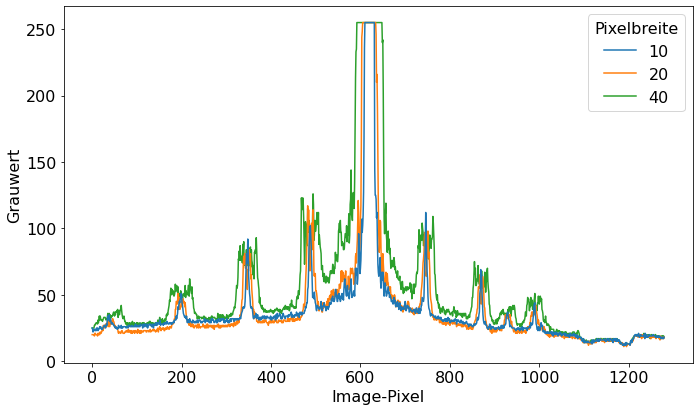

In [161]:
pixelbreite = np.array(["10", "20", "40"])
fig,ax = plt.subplots(1,1, figsize=(10,6))

for i, p in enumerate(pixelbreite):
    filepath = f"Sec5/Einzelspalt/Green{p}.png"

    img = Image.open(filepath).convert('L')
    WIDTH, HEIGHT = img.size
    pix = img.load()

    data = np.asarray(img.getdata())
    data = data.reshape((HEIGHT,WIDTH))
    data_middle = data[int(HEIGHT/2),:]
    ax.plot(data_middle, label=f"{p}", alpha=1, zorder=5-i)

ax.set_xlabel("Image-Pixel")
ax.set_ylabel("Grauwert")
ax.legend(title="Pixelbreite")
plt.tight_layout()
plt.savefig("Abb/Sec_5_1_3_Spaltbreiten")
plt.show()

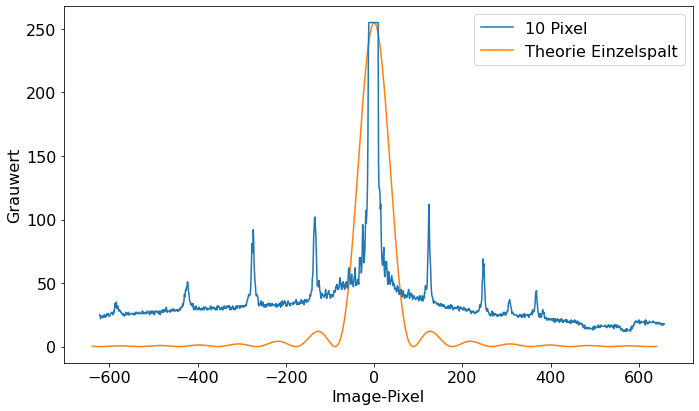

In [160]:
pixelbreite = np.array(["10"])
pixel = np.arange(1,1281)-int(WIDTH/2)
fig,ax = plt.subplots(1,1, figsize=(10,6))

for i, p in enumerate(pixelbreite):
    filepath = f"Sec5/Einzelspalt/Green{p}.png"

    img = Image.open(filepath).convert('L')
    WIDTH, HEIGHT = img.size
    pix = img.load()

    data = np.asarray(img.getdata())
    data = data.reshape((HEIGHT,WIDTH))
    data_middle = data[int(HEIGHT/2),:]
    ax.plot(pixel+17, data_middle, label=f"{p} Pixel", alpha=1, zorder=5-i)

Dy = 10*36*1000.0/532
d = 60000 #cm
intensity = np.sinc((Dy*pixel)/d)**2*255
ax.plot(pixel, intensity, label=f"Theorie Einzelspalt", alpha=1)

ax.set_xlabel("Image-Pixel")
ax.set_ylabel("Grauwert")
ax.legend()
plt.tight_layout()
plt.savefig("Abb/Sec_5_1_Theorievergleich")
plt.show()

In [66]:
pixel = np.arange(1,1281)-int(WIDTH/2)
Dy = 10*36*1000.0/532
d = 80000 #cm

intensity = np.sinc((Dy*pixel)/d)**2
intensity = intensity/max(intensity)*255

In [119]:
pixelbreite = np.array(["10", "20", "40"])

for i, p in enumerate(pixelbreite):
    filepath = f"Sec5/Einzelspalt/Green{p}.png"

    img = Image.open(filepath).convert('L')
    WIDTH, HEIGHT = img.size
    pix = img.load()

    data = np.asarray(img.getdata())
    data = data/255
    data = data.reshape((HEIGHT,WIDTH))
    data_middle = data[int(HEIGHT/2+50),:]
    # plt.plot(pixel, data_middle, label=f"{p}", alpha=1, zorder=5-i)

def plot(d):
    intensity = np.sinc((Dy*pixel)/d)**2
    intensity = intensity/max(intensity)
    plt.figure(figsize=(10,6))

    plt.plot(pixel, intensity, label=f"Theorie", alpha=1)
    plt.plot(pixel+20, data_middle, label=f"{p}", alpha=1, zorder=5-i)


ax.set_xlabel("Image-Pixel")
ax.set_ylabel("Grauwert")
ax.legend(title="Pixelbreite")
# plt.show()
interactive(plot, d=(50000,80000, 1))

No handles with labels found to put in legend.


interactive(children=(IntSlider(value=65000, description='d', max=80000, min=50000), Output()), _dom_classes=(…

In [145]:
pixelbreite = np.array(["10", "20", "40"])
alpha = np.arange(-1,1,0.001)

for i, p in enumerate(pixelbreite):
    filepath = f"Sec5/Einzelspalt/Green{p}.png"

    img = Image.open(filepath).convert('L')
    WIDTH, HEIGHT = img.size
    pix = img.load()

    data = np.asarray(img.getdata())
    data = data/255
    data = data.reshape((HEIGHT,WIDTH))
    data_middle = data[int(HEIGHT/2+50),:]
    # plt.plot(pixel, data_middle, label=f"{p}", alpha=1, zorder=5-i)

def plot(d, N, g,a):
    intensity = (np.sinc((Dy*np.sin(np.radians(alpha*a)))))**2
    # intensity = 1
    intensity = intensity*((np.sin((N*np.pi*g*1000*np.sin(np.radians(alpha)))/532))/(np.sin((np.pi*g*1000*np.sin(np.radians(alpha)))/532)))**2
    # intensity = intensity/max(intensity)
    plt.figure(figsize=(10,6))

    plt.plot(alpha, intensity, label=f"Theorie", alpha=1)
    # plt.scatter(pixel+20, data_middle, label=f"{p}", alpha=1, zorder=5-i)


ax.set_xlabel("Image-Pixel")
ax.set_ylabel("Grauwert")
ax.legend(title="Pixelbreite")
# plt.show()
interactive(plot, d=(50000,100000, 1), N=(1,15,1), g=(1,100,0.1), a=(0,1,0.01))

No handles with labels found to put in legend.


interactive(children=(IntSlider(value=75000, description='d', max=100000, min=50000), IntSlider(value=8, descr…

In [94]:
# fig,ax = plt.subplots(1,1, figsize=(10,6))

def plot(d):
    # x = np.random.rand(10)
    # y = m *x + c
    # plt.plot(x,y)
    # plt.show()
    intensity = np.sinc((Dy*pixel)/d)**2
    plt.plot(pixel, data_middle, label=f"{p}", alpha=1, zorder=5-i)
    plt.plot(pixel, intensity, label=f"Theorie", alpha=1)
interactive(plot, d=(0,1000000, 1))

interactive(children=(IntSlider(value=500000, description='d', max=1000000), Output()), _dom_classes=('widget-…